In [1]:
# All imports go here
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load data
df_aisles = pd.read_csv('./data/aisles.csv')
df_departments = pd.read_csv('./data/departments.csv')
df_orders = pd.read_csv('./data/orders.csv')
df_order_products_prior = pd.read_csv('./data/order_products__prior.csv')
df_order_products_train = pd.read_csv('./data/order_products__train.csv')
df_products = pd.read_csv('./data/products.csv')

In [7]:
df_aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [8]:
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [9]:
df_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [10]:
df_order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [133]:
df_products.sort_values(by=['aisle_id', 'department_id'])

,product_id,product_name,aisle_id,department_id
208,209,Italian Pasta Salad,1,20
553,554,Turkey Chili,1,20
885,886,Whole Grain Salad with Roasted Pecans & Mango ...,1,20
1599,1600,Mediterranean Orzo Salad,1,20
2538,2539,Original Potato Salad,1,20
...,...,...,...,...
47712,47713,Sparkling Rose,134,5
48983,48984,Dry Sherry,134,5
49437,49438,Dry Fino Sherry,134,5
49561,49562,Blanc De Noirs Sparkling Wine,134,5


In [12]:
df_order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


# Statistics

In this section, we aim to extract some insights from the data, which are likely to help build a predictive model.

In [24]:
df_concated_prior = pd.merge(df_order_products_prior, df_orders, on='order_id')

In [25]:
df_concated_train = pd.merge(df_order_products_train, df_orders, on='order_id')

In [26]:
df_orders.groupby('eval_set').count()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
eval_set,,,,,,
prior,3214874,3214874,3214874,3214874,3214874,3008665
test,75000,75000,75000,75000,75000,75000
train,131209,131209,131209,131209,131209,131209


## Distribution of orders on order_hour_of_day

In [41]:
order_num_by_hour = df_concated_prior.groupby('order_hour_of_day')['order_id'].nunique().values

In [45]:
df_order_num_by_hour = pd.DataFrame()

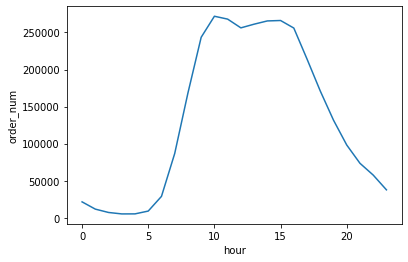

In [47]:
df_order_num_by_hour['hour'] = range(24)
df_order_num_by_hour['order_num'] = order_num_by_hour

sns.lineplot(data=df_order_num_by_hour, x='hour',y='order_num')

We can see that the peak time of orders is between 9:00 to 15:00

## Distirbution of orders on order_dow

In [63]:
order_num_by_day = df_concated_prior.groupby('order_dow')['order_id'].nunique().values

In [64]:
df_order_num_by_day = pd.DataFrame()

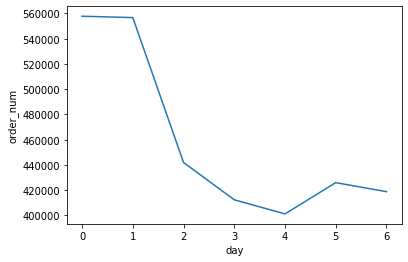

In [66]:
df_order_num_by_day['day'] = range(7)
df_order_num_by_day['order_num'] = order_num_by_day

sns.lineplot(data=df_order_num_by_day, x='day',y='order_num')

People enjoy shopping on the first two days.

## Average days_since_prior_order of every department

In [69]:
df_concated_prior = pd.merge(df_concated_prior, df_products, on='product_id')

In [79]:
df_concated_prior_without_null = df_concated_prior.dropna(subset=['days_since_prior_order'])

In [92]:
for index, row in df_concated_prior_without_null.groupby('department_id'):
    print(row['department_id'].values[0], sum(row['order_hour_of_day'])/row.shape[0])

1 13.667958706689591
2 13.494325718496684
3 13.379811595229404
4 13.412998809318635
5 13.580875572768155
6 13.5077129604104
7 13.299737840588207
8 13.576557886302016
9 13.53010941543732
10 13.444166768255517
11 13.471973663010623
12 13.4555492741443
13 13.445748290657233
14 13.315994498036416
15 13.440624082261548
16 13.352660881175426
17 13.337444873609824
18 13.383170327548186
19 13.346830628812613
20 13.466741069153544
21 13.44969272865922


The average days_since_prior_order are almost the same.

## Average reorder rate

reorder rate = # of reorder / total orders

In [108]:
for index, row in df_concated_prior.groupby('department_id'):
    print(index, row[row['order_hour_of_day'].notnull()].shape[0] / row.shape[0])

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0


Every department is reordered.

# Solution

In this section, we will give a possible solution which is building a classifier to calculate the probability of purchasing the product. As well as the features we already have, we add more features, for example the average number of days of buying a product.

In [3]:
# data preprocess

# concatenate previous contents and train data
df_order_products = pd.concat([df_order_products_prior, df_order_products_train])
# merge order and order_products
df_merged_orders = pd.merge(df_orders, df_order_products, on='order_id')
# sort by user_id and order_number
df_merged_orders = df_merged_orders.sort_values(by=['user_id', 'order_number'], ascending=[True, True])
# get the user whose id is in the test dataset
df_merged_orders = df_merged_orders[df_merged_orders['user_id'].isin(df_orders[df_orders['eval_set'] == 'test']['user_id'].values)]

In [8]:
# add a day index for each user
day_index = []
last_user = ''
last_order_number = 1
for index, row in df_merged_orders.iterrows():
    if row['order_number'] == 1 and last_user != row['user_id']:
        day_count = 0
        last_user = row['user_id']
        last_order_number = row['order_number']

    if last_order_number == row['order_number']:
        day_index.append(day_count)
    else:
        day_count += row['days_since_prior_order']
        last_order_number = row['order_number']
        day_index.append(day_count)

df_merged_orders['day_index'] = day_index

In [9]:
df_merged_orders.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,day_index
296,1374495,3,prior,1,1,14,NaN,9387,1,0,0.0
297,1374495,3,prior,1,1,14,NaN,17668,2,0,0.0
298,1374495,3,prior,1,1,14,NaN,15143,3,0,0.0
299,1374495,3,prior,1,1,14,NaN,16797,4,0,0.0
300,1374495,3,prior,1,1,14,NaN,39190,5,0,0.0
301,1374495,3,prior,1,1,14,NaN,47766,6,0,0.0
302,1374495,3,prior,1,1,14,NaN,21903,7,0,0.0
303,1374495,3,prior,1,1,14,NaN,39922,8,0,0.0
304,1374495,3,prior,1,1,14,NaN,24810,9,0,0.0
305,1374495,3,prior,1,1,14,NaN,32402,10,0,0.0


In [ ]:
# For every reordered items, get the shortest, longest and average purchase periods by person
user_purchase_history = {}

def diff_neighbour(a_list):
    """ calculate the difference between every two neighbours 
    """
    difference = []
    for i in range(1, a_list.__len__()):
        difference.append(a_list[i] - a_list[i - 1])
    return difference

for user_id in df_merged_orders['user_id'].unique():
    user_purchase_history[user_id] = {}
    product_ids = df_merged_orders[(df_merged_orders['user_id'] == user_id) & (df_merged_orders['reordered'] == 1)]['product_id'].unique()
    for product_id in product_ids:
        user_purchase_history[user_id][product_id] = []
        day_indexs = df_merged_orders[(df_merged_orders['user_id'] == user_id) & (df_merged_orders['product_id'] == product_id)]
        user_purchase_history[user_id][product_id] = diff_neighbour(day_indexs['day_index'].values)

rows = []
for user_id, value in user_purchase_history.items():
    for product_id, day_indexs in value.items():
        rows.append([user_id, product_id, min(day_indexs), max(day_indexs), sum(day_indexs)/day_indexs.__len__()])
df_purchase_history = pd.DataFrame(rows, columns = ['user_id', 'product_id', 'min_period', 'max_period', 'avg_period'])

In [7]:
df_merged_orders.head(50)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
296,1374495,3,prior,1,1,14,NaN,9387,1,0
297,1374495,3,prior,1,1,14,NaN,17668,2,0
298,1374495,3,prior,1,1,14,NaN,15143,3,0
299,1374495,3,prior,1,1,14,NaN,16797,4,0
300,1374495,3,prior,1,1,14,NaN,39190,5,0
301,1374495,3,prior,1,1,14,NaN,47766,6,0
302,1374495,3,prior,1,1,14,NaN,21903,7,0
303,1374495,3,prior,1,1,14,NaN,39922,8,0
304,1374495,3,prior,1,1,14,NaN,24810,9,0
305,1374495,3,prior,1,1,14,NaN,32402,10,0


In [ ]:
df_purchase_history

In [ ]:
# Add the day before last purchase as a feature
negative_rows = []
positive_rows = []

for user_id in df_merged_orders['user_id'].unique():
    reordered_ids = df_merged_orders[(df_merged_orders['user_id'] == user_id) & (df_merged_orders['reordered'] == 1)]['product_id'].unique():
    for _, row in df_merged_orders[df_merged_orders['user_id'] == user_id].groupby('order_number'):
        if row['order_number'] == 1:
            pass

        if list(set(reordered_ids) - set(row['product_id'].values)):
            for reordered_id in reordered_ids:
                negative_rows.append([row['order_id'].values[0], user_id, row['eval_set'].values[0], row['order_number'].values[0], 
                             row['order_dow'].values[0], row['order_hour_of_day'].values[0], row['days_since_prior_order'].values[0],
                             reordered_id, -1, -1, 
                             row['day_index'].values[0]])

    for _,row in df_merged_orders[(df_merged_orders['user_id'] == user_id) & (df_merged_orders['reordered'] == 1)].iterrows():
        positive_rows.append([row['order_id'], row['user_id'], row['eval_set'], row['order_number'], 
                        row['order_dow'], row['order_hour_of_day'], row['days_since_prior_order'],
                        row['product_id'], row['add_to_cart_order'], row['reordered'], 
                        row['day_index'].values[0]])

df_positives = pd.DataFrame(positive_rows, columns=['order_id', 'user_id', 'eval_set', 
                                           'order_number', 'order_dow', 'order_hour_of_day', 
                                           'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'day_index'])
df_negatives = pd.DataFrame(negative_rows, columns=['order_id', 'user_id', 'eval_set', 
                                           'order_number', 'order_dow', 'order_hour_of_day', 
                                           'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'day_index'])